In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("mpg.csv", header=0)
df 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [12]:
df.dropna(axis=0, inplace=True)
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [25]:
x1 = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y1 = df[['mpg']]
x1_add = sm.add_constant(x1, prepend=False)

In [26]:
model1 = sm.OLS(y1, x1_add)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          3.79e-135
Time:                        12:09:06   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.3299      0.332     -0.993   

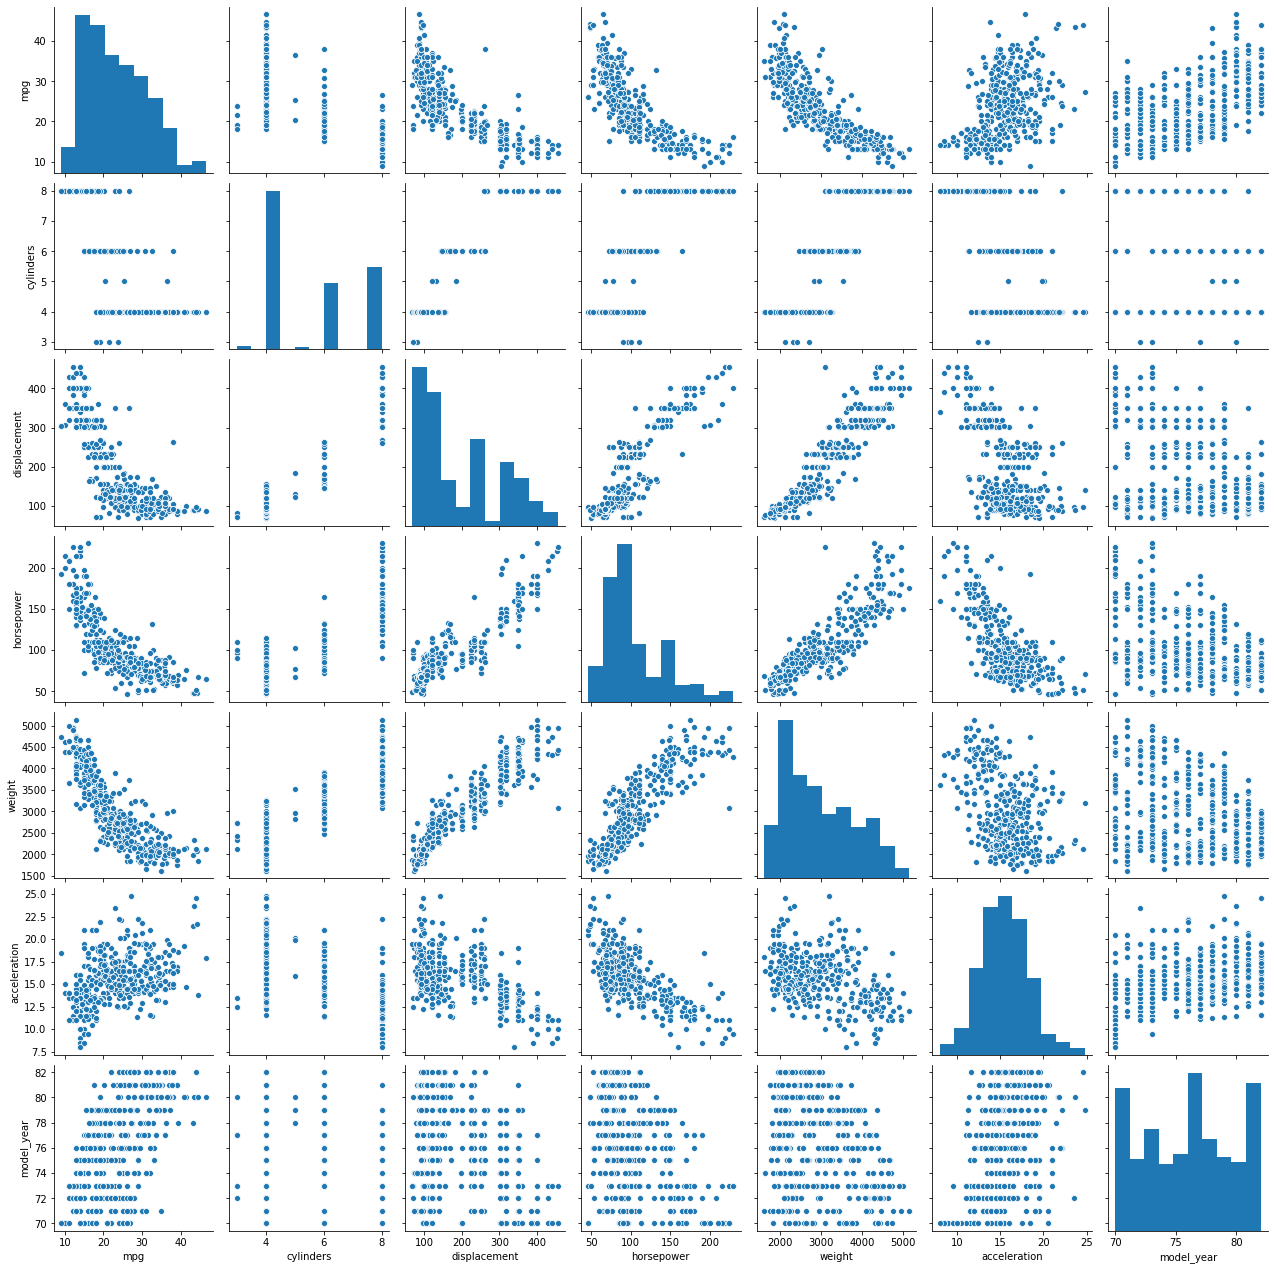

In [30]:
sns.pairplot(df)
plt.show()

In [36]:
#model 2
x2 = df[['acceleration']]
y2 = df[['mpg']]
x2_add = sm.add_constant(x1, prepend=False)

In [37]:
model1 = sm.OLS(y1, x1_add)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     85.15
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           1.78e-18
Time:                        13:09:04   Log-Likelihood:                -1322.5
No. Observations:                 392   AIC:                             2649.
Df Residuals:                     390   BIC:                             2657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
acceleration     1.1976      0.130      9.228   

In [53]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [54]:
from sklearn.model_selection import train_test_split
x = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = df[['mpg']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [62]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [56]:
y_predict = mlr.predict(x_test)

In [57]:
print(mlr.score(x_train, y_train))

0.8149104665345216


In [64]:
#model2
x2 = df[['cylinders', 'displacement', 'horsepower', 'weight']]
y2 = df[['mpg']]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.8, test_size=0.2)

In [65]:
from sklearn.linear_model import LinearRegression
mlr2 = LinearRegression()
mlr2.fit(x2_train, y2_train) 

LinearRegression()

In [67]:
y2_predict = mlr2.predict(x2_test)

In [69]:
print(mlr2.score(x2_train, y2_train))

0.7131027061482125


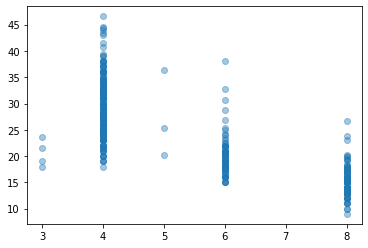

In [70]:
##
plt.scatter(df[['cylinders']], df[['mpg']], alpha=0.4)
plt.show()

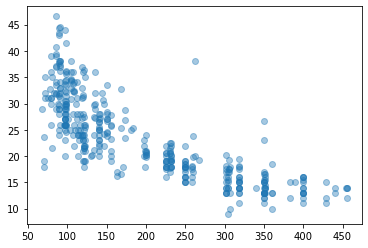

In [71]:
plt.scatter(df[['displacement']], df[['mpg']], alpha=0.4)
plt.show()

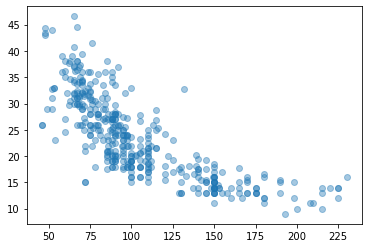

In [72]:
plt.scatter(df[['horsepower']], df[['mpg']], alpha=0.4)
plt.show()

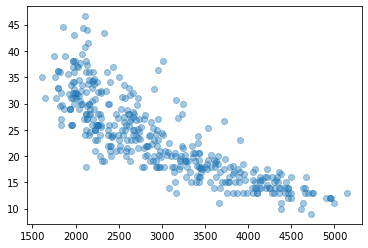

In [73]:
plt.scatter(df[['weight']], df[['mpg']], alpha=0.4)
plt.show()

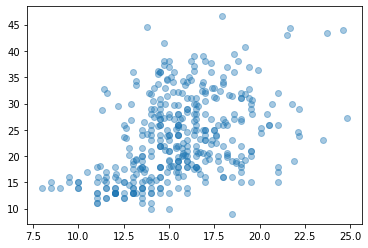

In [74]:
plt.scatter(df[['acceleration']], df[['mpg']], alpha=0.4)
plt.show()

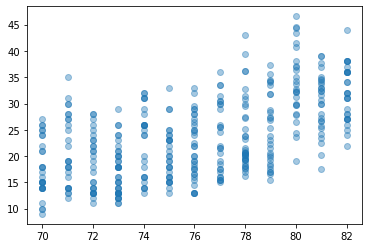

In [75]:
plt.scatter(df[['model_year']], df[['mpg']], alpha=0.4)
plt.show()